# Spam Filter using Naive Bayes

In [1]:
# To read the csv files in arrays and dataframes.
import numpy as np
import pandas as pd

## A. Load and understand the dataset

In [2]:
url = "https://github.com/robitussin/CCMACLRL/blob/daf272c30af3ccb2aab444e608a62b8f60ca558b/6%20-%20Naive%20Bayes/implementation/spam.csv?raw=true"
data = pd.read_csv(url, encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Check for the null values if any and count the total number of null values.

In [29]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


There are so many null values in the 3rd, 4th and 5th columns and it is better to remove them. Also rename the column names as they doesn't sound familiar.

In [30]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.rename(columns= { 'v1' : 'class' , 'v2' : 'message'}, inplace= True)
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## B. Data Visualization

<ipython-input-32-ac1dd06f7678>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count =pd.value_counts(data["class"], sort= True)


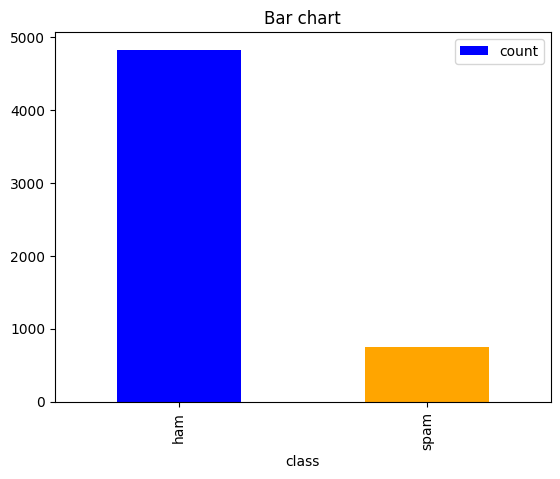

In [32]:
import matplotlib.pyplot as plt
count =pd.value_counts(data["class"], sort= True)
count.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.legend(loc='best')
plt.show()

As we see that the count of spam email is less.

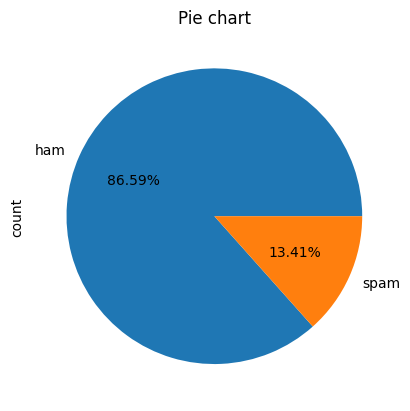

In [33]:
count.plot(kind = 'pie',autopct='%1.2f%%') # 1.2 is the decimal points for 2 places
plt.title('Pie chart')
plt.show()

In [34]:
data.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Add a new column called Length and check the size of each message.

In [35]:
data['length'] = data['message'].apply(len)
# swapping the columns
data = data[['message', 'length', 'class']]
data.head()

,message,length,class
0,"Go until jurong point, crazy.. Available only ...",111,ham
1,Ok lar... Joking wif u oni...,29,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,spam
3,U dun say so early hor... U c already then say...,49,ham
4,"Nah I don't think he goes to usf, he lives aro...",61,ham


## C. Cleaning and Preparing Data

The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.

### What are Stop words?

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words taking up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to be stop words.

- Remove all Non-words in the message( ex : if there are any special characters or numbers, they are replaced with spaces.)
- Changing all the characters to lower case letters. We can do it in with the upper case as well, but lower case looks better in approach. ( ex : the syste must treat the characters 'A' and 'a' the same.
- Splitting each word in the sentence and separated by comma
- Checking the stop words ( if any ) and removing them accordingly.
The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.

The reason why we stem is to shorten the lookup, and normalize sentences.

Consider:

"I was taking a ride in the car."

"I was riding in the car."

This sentence means the same thing. in the car is the same

Joining all the words into a single sentence after splitting and checking each word in a sentence. it joins all the words.

In [36]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download("stopwords")
# nltk.download('punkt')

def clean_message(message):
    message = re.sub("[^A-Za-z]", " ", message) #1
    message = message.lower() #2
    message = message.split() #3
    stemmer = PorterStemmer()   #4. to find the  root meaning word of each word
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))] #5
    message = " ".join(message) #6 #Keeping cleaned words together
    return message

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's test how our function works. We shall take the original data and the 1st value.

In [37]:
message = data.message[0]
print(message)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Testing the data after text mining from the actual data given and performing all the operiations on the data.

In [38]:
message = clean_message(message)
print(message)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


Let us apply the function to all the rows in the data.

In [39]:
messages = []
for i in range(0, len(data)):
    message = clean_message(data.message[i])
    messages.append(message)

In [40]:
data = data.drop(["message"],axis=1)
data['messages'] = messages
data.head()

,length,class,messages
0,111,ham,go jurong point crazi avail bugi n great world...
1,29,ham,ok lar joke wif u oni
2,155,spam,free entri wkli comp win fa cup final tkt st m...
3,49,ham,u dun say earli hor u c alreadi say
4,61,ham,nah think goe usf live around though


## D. Split the data intro train and test

In [41]:
#let's seperate the output and documents
y = data["class"].values
x = data["messages"].values

In [42]:
from sklearn.model_selection import train_test_split
#splitting the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
# test size is 0.3 which is 70 : 30
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3900,) (3900,) (1672,) (1672,)


## E. Feature Selection

### Bag-of-Words

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

Bag of Words (BoW) is an algorithm that counts how many times a word appears in a document. It’s a tally. Those word counts allow us to compare documents and gauge their similarities for applications like search, document classification and topic modeling. BoW is a also method for preparing text for input in a deep-learning net.

BoW lists words paired with their word counts per document. In the table where the words and documents that effectively become vectors are stored, each row is a word, each column is a document, and each cell is a word count. Each of the documents in the corpus is represented by columns of equal length. Those are wordcount vectors, an output stripped of context.

Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

Example : Hello, how are you ?

After making the sentence into tokens : "Hello", "how", "are", "you"



### Feature selection using TF-IDF ( Term Frequency - Inverse Document Frequency )

This method is also called as Normalization. TF - How many times a particular word appears in a single doc. IDF - This downscales words that appear a lot across documents.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english',max_df=0.5)

#fitting train data and then transforming it to count matrix#fitting
X_train_transformed = vect.fit_transform(X_train)
#print(x_train)

#transforming the test data into the count matrix initiated for train data
X_test_transformed = vect.transform(X_test)

97.188995215311
[[1453    1]
 [  46  172]]


Training the model

In [ ]:
# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data
nb.fit(X_train_transformed, y_train)

#predicting the model on train and test data
y_pred_test = nb.predict(X_test_transformed)
y_pred_train = nb.predict(X_train_transformed)

Evaluate the model

In [ ]:
#checking accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test)*100)

#Making Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
print(cm)

### Feature selection using Count Vectorizer

The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.



In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vect1 = CountVectorizer(stop_words='english',max_df=0.5)

#fitting train data and then transforming it to count matrix#fitting
X_train_transformed = vect1.fit_transform(X_train)

#transforming the test data into the count matrix initiated for train data
X_test_transformed = vect1.transform(X_test)

98.50478468899522
[[1446    8]
 [  17  201]]


Train the model

In [ ]:
# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data
nb.fit(X_train_transformed,y_train)

#predicting the model on train and test data
y_pred_test = nb.predict(X_test_transformed)
y_pred_train = nb.predict(X_train)

Evaluate the model

In [ ]:
#checking accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test)*100)

#Making Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
print(cm)

Looks like the count vectorizer is giving the most accutate result of 98 where as TfIdf is at 97

### F. Test the model

In [45]:
new_text = pd.Series('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. valid 12 hours')
new_text_transform = vect.transform(new_text)
print(" The email is a" ,nb.predict(new_text_transform))

 The email is a ['spam']


In [46]:
new_text = pd.Series(" Hello, how are you?")
new_text_transform = vect.transform(new_text)
print(" The email is a" ,nb.predict(new_text_transform))

 The email is a ['ham']
